In [6]:
DSCI 100 Individual Planning Stage

ERROR: Error in parse(text = x, srcfile = src): <text>:1:6: unexpected numeric constant
1: DSCI 100
         ^


In [7]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
source('cleanup.R')


Warning message in file(filename, "r", encoding = encoding):
“cannot open file 'cleanup.R': No such file or directory”


ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


players.csv:
- Observations: 196
- Variables: 7

| Variable     | Type     	             | Missing Values |	Description                                              | 
| --------     | --------------------    | -------------- | -------------------------------------------------------- |
| experience   | Character (categorical) |	0	          | Player's self-reported experience level.                 |
| subscribe    | Logical (categorical)   |	0	          | Indicates whether the player has an active subscription. |
| hashedEmail  | Character (categorical) |	0	          | Anonymized, unique identifier for each player.           |
| played_hours | Double (numerical)      |	0	          | Total cumulative hours the player has played.            |
| name         | Character (categorical) |	0	          | The player's first name.                                 |
| gender	   | Character (categorical) |  0	          | The player's self-reported gender.                       |
| Age	       | Double (numerical)      |	2	          | The player's age.                                        |

Categorical variables:
- experience: 5 unique values.
- subscribe: 2 unique values.
- gender: 7 unique values.
- hashedEmail: 196 unique values.
- name: 196 unique values.

Observed issues:
- There are 2 missing values in the Age column.
- Many users logged very little hours played on the game, causing significant outliers.

Potential issues:
- Variables like Age, gender, and experience are self-reported and may be inaccurate.

How the data was collected:
- A UBC computer science research group developed a game similar to Minecraft, and they kept track of specific statistics of each player, such as age, gender, and number of hours played.

sessions.csv:

- Observations: 1535
- Variables: 5


| Variable            | Type     	            | Missing Values |	Description                                                  | 
| ------------------- | ----------------------- | -------------- | ------------------------------------------------------------- |
| hashedEmail         | Character (categorical) |	0	         | Anonymized, unique identifier for each player.                |
| start_time          | Character (categorical) |	0	         | The start time of the session.                                |
| end_time            | Character (categorical) |	2	         | The end time of the session.                                  |
| original_start_time | Double (numerical)      |	0	         | Computer-readable timestamp of the start time of the session. |
| original_end_time   | Double (numerical)      |	2	         | Computer-readable timestamp of the end time of the session.   |                     

Observed issues:
- There are no units for original_start_time and original_end_time.
- Some players that appear in players.csv are not present in this dataset.
- 2 sessions have no end_time.

Potential issues:
- Many players may start a session but leave their screen temporarily, which would still count towards the duration of their session.
- There is no consistent timezone stated.

How the data was collected:
- A UBC computer science research group developed a game similar to Minecraft, and they kept track of the session activity for each player, matching a start and end time for each user.

- played_hours mean: 5.846
- Age mean: 21.14
- original_start_time mean: 1.719e+12
- original_end_time mean: 1.719e+12

Can a player's age and experience level predict whether or not they will subscribe to the game-related newsletter in players.csv?

In [11]:
urlplayers <- "https://raw.githubusercontent.com/nick-xing23/ubiquitous-robot/refs/heads/main/players.csv"
players <- read_csv(urlplayers, show_col_types = FALSE)

urlsessions <- "https://raw.githubusercontent.com/nick-xing23/ubiquitous-robot/refs/heads/main/sessions.csv"
sessions <- read_csv(urlsessions, show_col_types = FALSE)

players
sessions

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


In [9]:
players_wrangled <- players |>
mutate(gender = factor(gender, levels = c("Male", "Female", "Non-binary", "Agender", "Prefer not to say", "Other", "Two-Spirited")),
    experience = factor(experience, levels = c("Beginner", "Amateur", "Regular", "Pro", "Veteran")))
players_wrangled

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<lgl>,<chr>,<dbl>,<chr>,<fct>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


In [38]:
players_average <- players_wrangled |>
summarize(across(where(is.numeric), ~ round(mean(.x, na.rm = TRUE), 2)))

average_wrangled <- players_average |>
pivot_longer(everything(),
             names_to = "variable",
             values_to = "mean_value") |>
arrange(variable)
average_wrangled

variable,mean_value
<chr>,<dbl>
Age,21.14
played_hours,5.85


Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


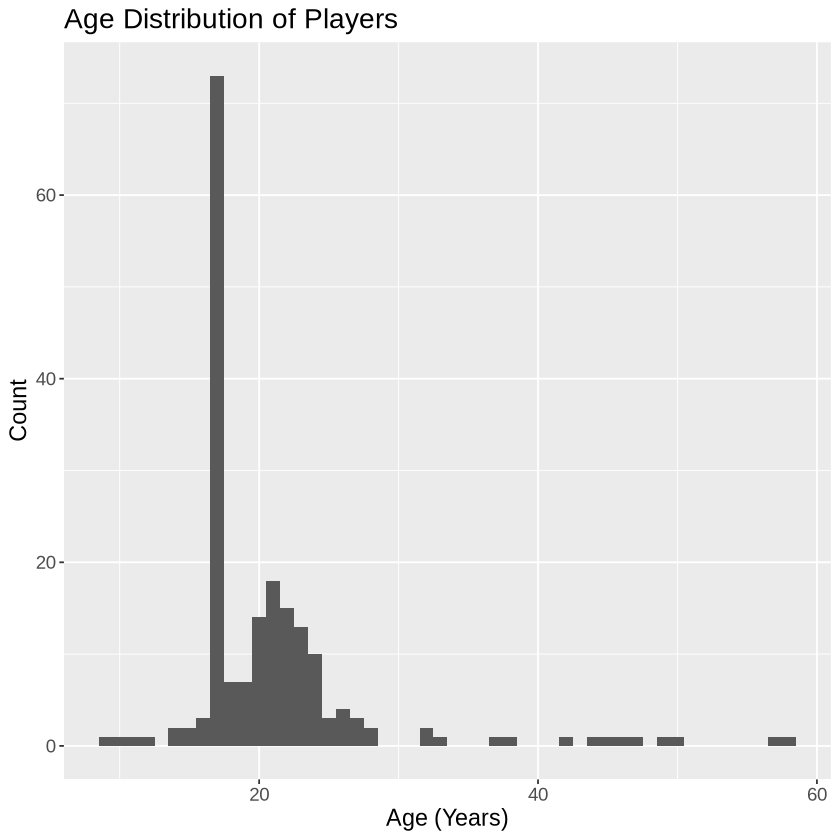

In [22]:
ggplot(players_wrangled, aes(x = Age)) +
geom_histogram(binwidth = 1) +
labs(title = "Age Distribution of Players",
     x = "Age (Years)",
     y = "Count") +
theme(text = element_text(size = 14))

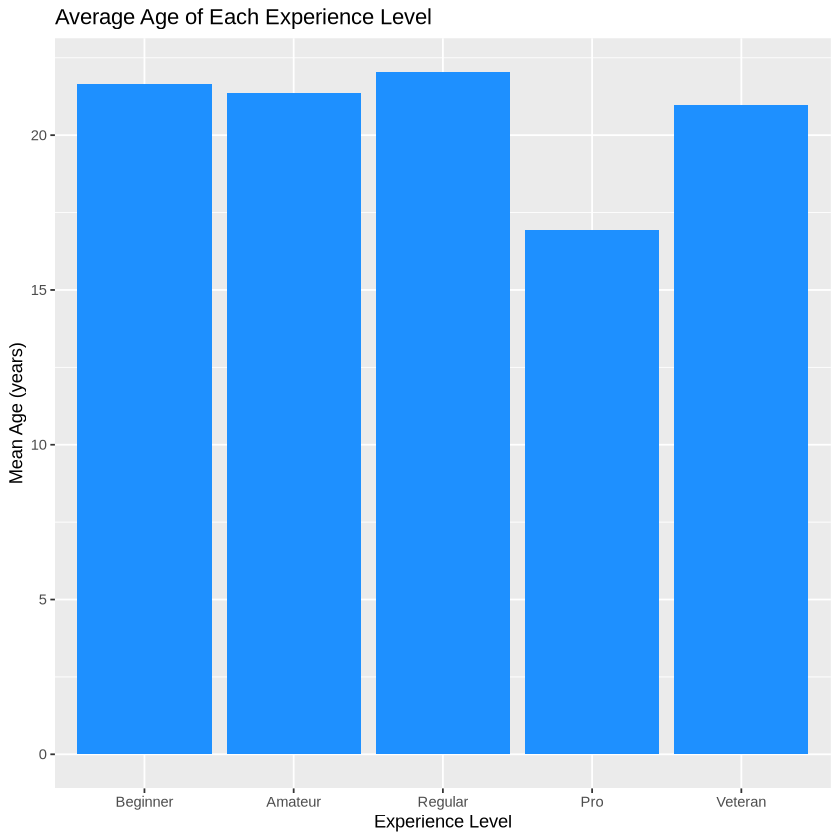

In [34]:
players_wrangled |>
  group_by(experience) |>
  summarize(mean_age = mean(Age, na.rm = TRUE)) |>
  ggplot(aes(x = experience, y = mean_age)) +
  geom_bar(stat = "identity", fill = "dodgerblue") +
  labs(title = "Average Age of Each Experience Level",
       x = "Experience Level",
       y = "Mean Age (years)")

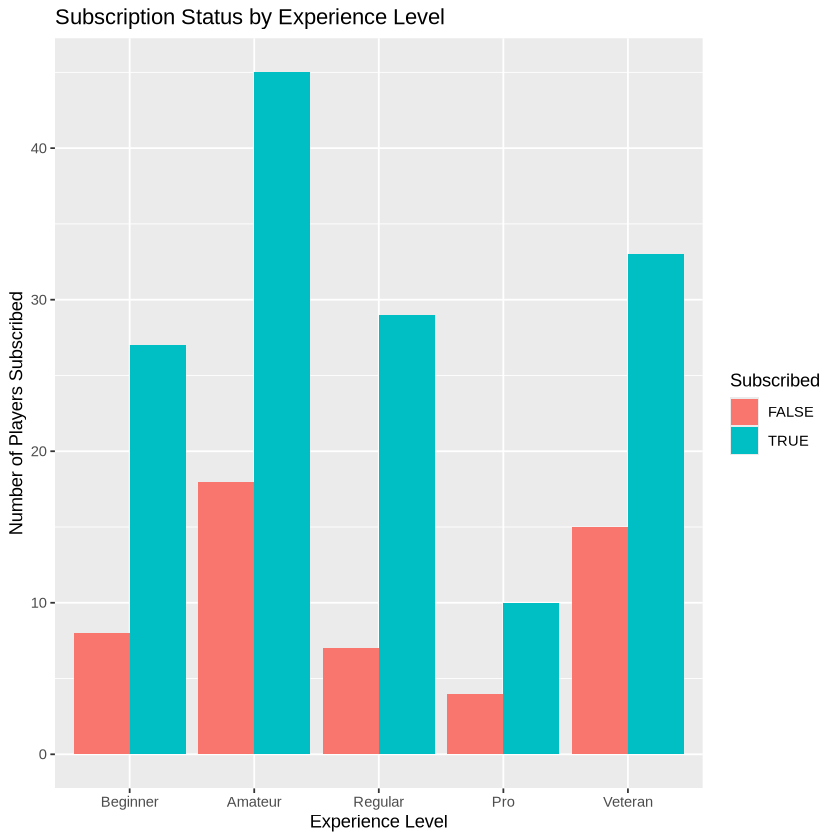

In [40]:
ggplot(players_wrangled, aes(x = experience, fill = subscribe)) +
  geom_bar(position = "dodge") +
  labs(title = "Subscription Status by Experience Level",
       x = "Experience Level",
       y = "Number of Players Subscribed",
       fill = "Subscribed")

- The majority of players are late teens to early 20s, making the age distribution slightly skewed.
- Beginners, Amateurs, Regulars, and Veterans all have similar average ages (around 21–22 years). Even though pros are significantly younger, this is unreliable as there are less pros in the dataset.
- Age differences across most experience levels are small, meaning experience is not strongly tied to age for most players.
- Across all experience levels, there is a greater number of subscribed players (blue) compared to non-subscribed players (red).

Method: K-NN classification

- K-Nearest Neighbours classification is an appropriate method for this task as the question asks us to predict the outcome for a categorical variable.

- However, this method requires us to make two main assumptions:
- All variables must be scaled before predicting to ensure no single variable dominates the distance calculation.
- The predictors (Age and experience) must be relevant to the research question.

- The K-NN algorithm struggles to complete tasks on large datasets, as it becomes very slow.
- The optimal K-value must be chosen. Small K-values will overfit and large K-values will underfit the data.

- Firstly, I will split the players.csv dataset into a training (75%) and test (25%) set, stratifying based on the subscribe variable.
- Next, Age and experience must be standardized.
- I will use the training data to build the model and tune it using 5-fold cross-validation to find the optimal K-value, while the testing set will be used to evaluate the accuracy of the model using confusion matrices.
- Finally, the best-performing K-value will be applied to the test set.

GitHub Repository: https://github.com/nick-xing23/ubiquitous-robot.git